In [1]:
import os
import sys
import sqlite3
import numpy as np
import pandas as pd
import geopandas as gp
import plotly.express as px
import skill_metrics as sm
import skill_metrics as sm
import matplotlib.pyplot as plt
import scipy.stats as scs

In [2]:
sys.path.append('/home/pooya/w/DroughtMonitoringIran/')

DATABASE_PATH = "./database/database.db"

### Monthly Data

In [3]:
conn = sqlite3.connect(DATABASE_PATH)

data = pd.read_sql(sql='SELECT * FROM data', con=conn)

conn.close()

### Columns

In [ ]:
data.columns.to_list()

'Station_ID',
'Station_Name',
'Province',
'Date',
'SPI_1',
'SPEI_1',
'SPI_3',
'SPEI_3',
'SPI_6',
'SPEI_6',
'SPI_9',
'SPEI_9',
'SPI_12',
'SPEI_12',
'GPM_Precipitation',
'PET_MOD16A2GF',
'NDVI',
'EVI',
'LSTDay',
'LSTNight',
'LST',
'PCI_GPM',
'VCI',
'TCI',
'VHI',
'CI_GPM',
'GPM_SPI_1',
'GPM_SPEI_1',
'GPM_SPI_3',
'GPM_SPEI_3',
'GPM_SPI_6',
'GPM_SPEI_6',
'GPM_SPI_9',
'GPM_SPEI_9',
'GPM_SPI_12',
'GPM_SPEI_12',


### Unique Station

In [ ]:
data[['Station_ID', 'Station_Name']].drop_duplicates().reset_index(drop=True)

### Select Stations
- Cluster 3: Bandar-e-anzali  
- Cluster 2: Baladeh  
- Cluster 1: Sari 

In [8]:
selected_stations = ["Bandar-e-anzali", "Baladeh", "Sari"]

### Select Features

In [24]:
scale = 1
di = 'SPEI'

sf = [
    # 'Station_ID',
    # 'Station_Name',
    f'{di}_{scale}',
    # 'GPM_Precipitation',
    # 'PET_MOD16A2GF',
    'NDVI',
    'EVI',
    # 'LSTDay',
    # 'LSTNight',
    'LST',
    'PCI_GPM',
    'VCI',
    'TCI',
    'VHI',
    'CI_GPM',
    f'GPM_{di}_{scale}',
]

df = data[sf]

In [19]:
corr_matrix = df.corr()

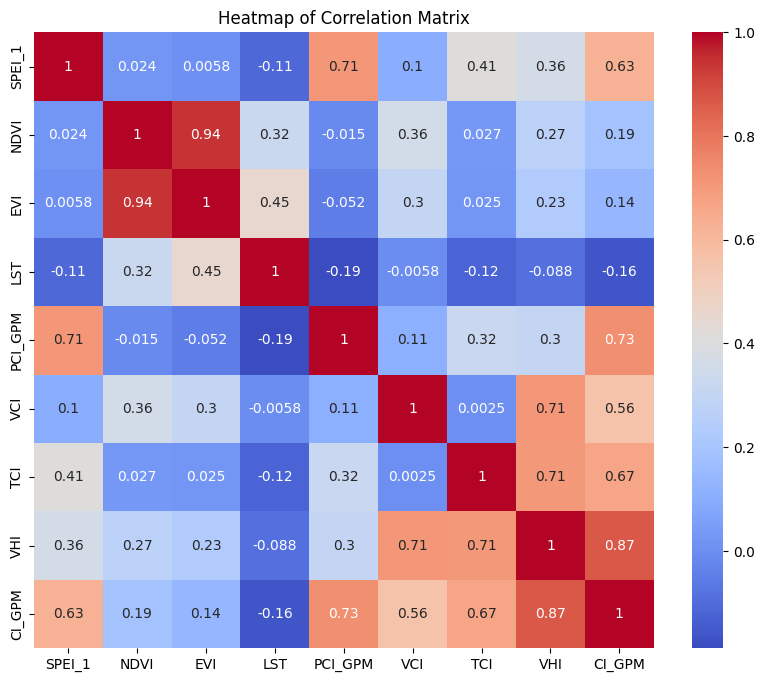

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Heatmap of Correlation Matrix')
plt.show()


/tmp/ipykernel_4566/3039917301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/tmp/ipykernel_4566/3039917301.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


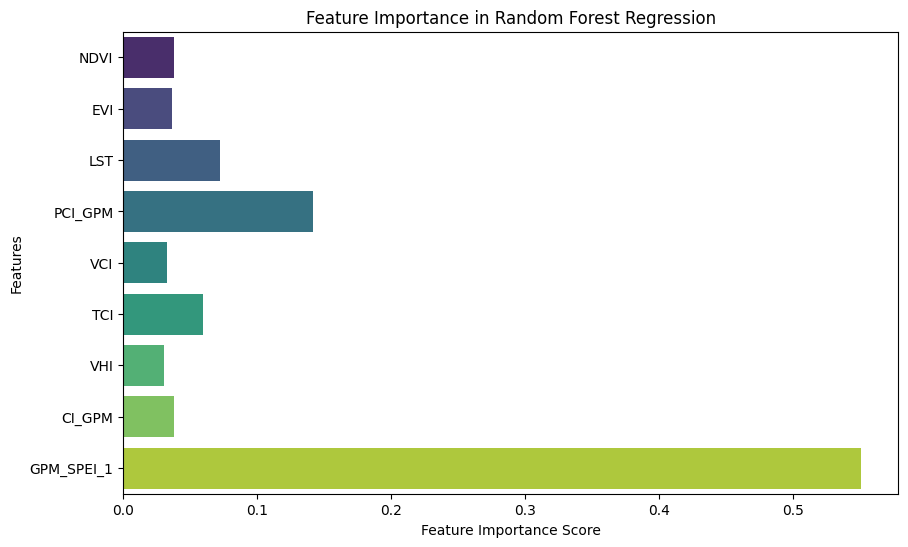

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df.dropna(inplace=True)
X = df.drop(columns=[f'{di}_{scale}'])
y = df[f'{di}_{scale}']

# فرض کنید X و y از قبل تعریف شده‌اند
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# دریافت اهمیت ویژگی‌ها
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regression")
plt.show()


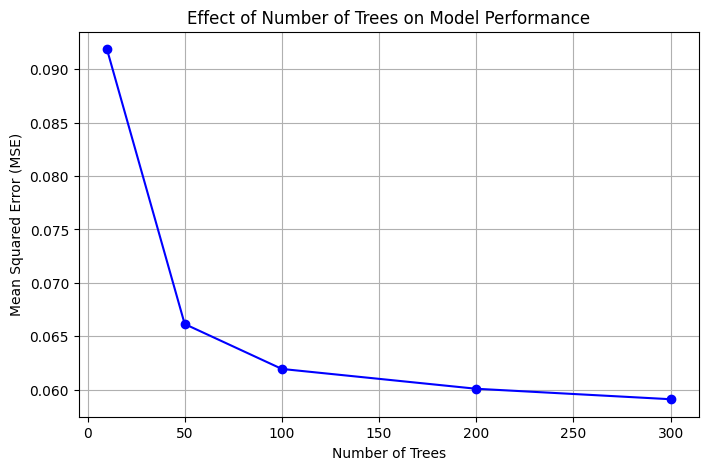

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, root_mean_squared_error

trees = [10, 50, 100, 200, 300]
errors = []

for n in trees:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X)
    errors.append(mean_squared_error(y, y_pred))

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.plot(trees, errors, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Number of Trees on Model Performance")
plt.grid(True)
plt.show()


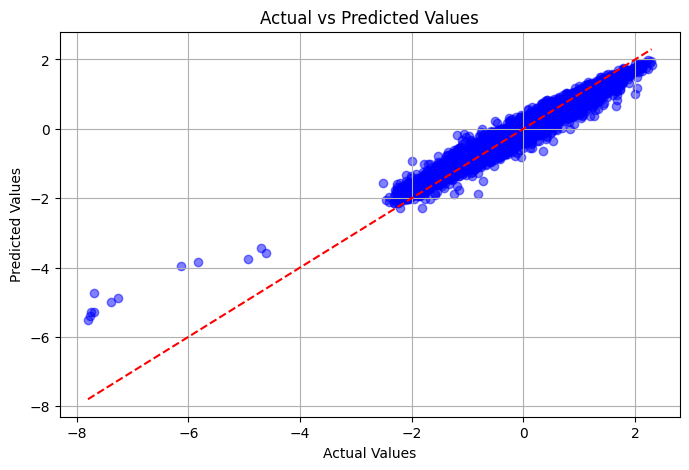

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(y, model.predict(X), alpha=0.5, color="blue")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()


/tmp/ipykernel_4566/1716245979.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), palette="coolwarm")


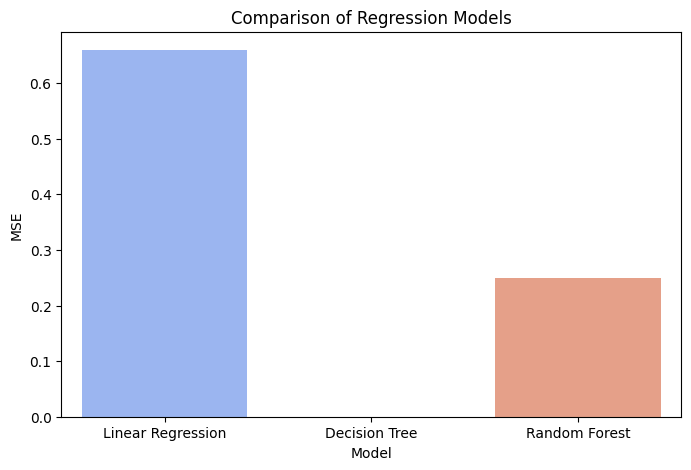

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

mse_scores = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse_scores[name] = root_mean_squared_error(y, y_pred)

# رسم نمودار
plt.figure(figsize=(8, 5))
sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Comparison of Regression Models")
plt.show()
